### Implicit BTCS Scheme for Diffusion Equation
**Problem**: Solve the diffusion equation $u_t=\alpha^2 u_{xx}$ $(0\leq x\leq L$, $0\leq t)$ with $\alpha=1$, using an implicit BTCS scheme. The inital condition and boundary conditions are given as $u(x,0)=exp{(-(x-x_0)^2/\sigma^2)}$ and $u(0,t)=u(L,t)=0$.

\begin{align}
\frac{u^{n+1}_k-u^n_k}{\Delta t}&=\frac{u^{n+1}_{k+1}-2u^{n+1}_k+u^{n+1}_{k-1}}{\Delta x^2}\\
u^{n+1}_k-u^n_k&=r\left[u^{n+1}_{k+1}-2u^{n+1}_k+u^{n+1}_{k-1}\right]\\
\end{align}
The finite difference equation requires that the $u^{(n+1)}$ terms are solved simultaneously through the linear system of $k$ equations.
<center></center>
\[
\begin{bmatrix}
    a_1 & b_1 & 0 & 0 & 0 & 0 \\
    c_2 & a_2 & b_2 & 0 & 0 & 0 \\
    0 & c_3 & a_3 & b_3 & 0 & 0 \\
    0 & 0 & \ddots & \ddots & \ddots & 0 \\
    0 & 0 & 0 & 0 & c_k & a_k
\end{bmatrix}
\begin{bmatrix}
    u^{n+1}_1 \\
    u^{n+1}_2 \\
    u^{n+1}_3 \\
    \vdots \\
    u^{n+1}_k
\end{bmatrix}
=
\begin{bmatrix}
    u^{n}_1 \\
    u^{n}_2 \\
    u^{n}_3 \\
    \vdots \\
    u^{n}_k
\end{bmatrix}
\]
The constants are $a_k\equiv1+2r$, $b_k=c_k\equiv-r$, and the boundary conditions require that $a_1=1$, $b_1=0$, $u^n_1=u(0,t)$ and $a_k=1$, $c_k=0$, $u^n_k=u(L,t)$.
\[
\begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 \\
    c_2 & a_2 & b_2 & 0 & 0 & 0 \\
    0 & c_3 & a_3 & b_3 & 0 & 0 \\
    0 & 0 & \ddots & \ddots & \ddots & 0 \\
    0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    u^{n+1}_1 \\
    u^{n+1}_2 \\
    u^{n+1}_3 \\
    \vdots \\
    u^{n+1}_k
\end{bmatrix}
=
\begin{bmatrix}
    u(0,t_1) \\
    u^{n}_2 \\
    \vdots \\
    u^{n}_{k-1} \\
    u(L,t_n)
\end{bmatrix}
\]
The tridiagonal matrix equation $Au^{(n+1)}=u^{(n)}$ has efficient methods for obtaining the solution through tridiagonal matrix algorithms.

In [35]:
using LinearAlgebra
using PyPlot

In [36]:
@time begin
    T, L = 100, 100
    dt, dx = 0.1, 0.1
    Nt, Nx = Int(T/dt + 1), Int(L/dx + 1)
    r = dt/dx^2

    f(x) = exp(-(x - 50)^2/150)
    x = range(0, stop=L, step=dx)
    u = zeros(Nt, Nx)
    u[1, :] = f.(x)
    A = zeros(Nx, Nx)
    for n = 1:Nt, k = 1:Nx
        if n == k
            A[n, k] = 1 + 2r
        elseif n == k - 1 || n == k + 1
            A[n, k] = -r
        end
    end

    for n = 1:(Nt - 1)
        u[n + 1, :] = A\u[n, :]
    end
end;

 82.963088 seconds (3.13 M allocations: 7.570 GiB, 0.95% gc time)


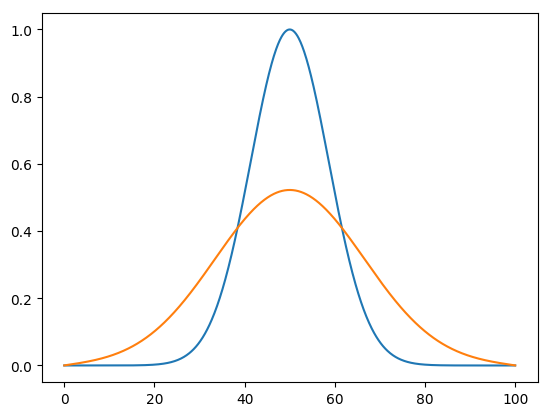

In [38]:
plot(x, u[1, :])
plot(x, u[end, :]);

In [39]:
@time begin
    T, L = 100, 100
    dt, dx = 0.1, 0.1
    Nt, Nx = Int(T/dt + 1), Int(L/dx + 1)
    r = dt/dx^2

    f(x) = exp(-(x - 50)^2/150)
    x = range(0, stop=L, step=dx)
    u = zeros(Nt, Nx)
    u[1, :] = f.(x)
    A = zeros(Nx, Nx)
    for n = 1:Nt, k = 1:Nx
        if n == k
            A[n, k] = 1 + 2r
        elseif n == k - 1 || n == k + 1
            A[n, k] = -r
        end
    end
    A = Tridiagonal(A)

    for n = 1:(Nt - 1)
        u[n + 1, :] = A\u[n, :]
    end
end;

  1.838388 seconds (4.15 M allocations: 186.218 MiB, 7.29% gc time)


In [42]:
@time begin
    T, L = 100, 100
    dt, dx = 0.1, 0.1
    Nt, Nx = Int(T/dt + 1), Int(L/dx + 1)
    r = dt/dx^2

    f(x) = exp(-(x - 50)^2/150)
    x = range(0, stop=L, step=dx)
    u = zeros(Nt, Nx)
    u[1, :] = f.(x)
    A = zeros(Nx, Nx)
    dl = du = -r*ones(Nx - 1)
    d = (1 + 2r)*ones(Nx)
    A = Tridiagonal(dl, d, du)

    for n = 1:(Nt - 1)
        u[n + 1, :] = A\u[n, :]
    end
end;

  0.194068 seconds (165.42 k allocations: 77.088 MiB, 50.92% gc time)
